# 特徴量エンジニアリング

In [19]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("data/bike_share.csv")
# 日付形式に変換
df["datetime"] = pd.to_datetime(df["datetime"])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter holiday - whether the day is considered a holiday
- workingday - whether the day ios neither a weekend nor holiday
- weather -
    1. : Clear, Few cloud, Partly cloudy
    2. : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. : Light Snow, Light Rain + Thunderstorm + Mist, Snow + Fog
    4. : Heavy Rain + ice Palletes + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals


## 日付

In [21]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["dayofyear"] = df["datetime"].dt.dayofyear
df["dayofweek"] = df["datetime"].dt.dayofweek # 月曜日が 0 、日曜日が 6
df["weekofyear"] = df["datetime"].dt.isocalendar().week
df["quarter"] = df["datetime"].dt.quarter
df["isleap"] = df["datetime"].dt.is_leap_year

In [22]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofyear,dayofweek,weekofyear,quarter,isleap
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,52,1,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,52,1,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,52,1,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,52,1,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,52,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,354,2,51,4,True
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,354,2,51,4,True
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,354,2,51,4,True
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,354,2,51,4,True


## 多項式特徴量
penguins_sizeデータセットの`culmen_length_mm`, `culmen_depth_mm`カラムを利用して,以下の多項式特徴量を作成する
- `culmen_length_mm^2` 
- `culmen_depth_mm^2`
- `culmen_length_mm * culmen_depth_mm`

In [23]:
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv("data/penguins_size.csv")
df.dropna(inplace=True)

poly = PolynomialFeatures(degree=2, include_bias=False) # 切片は含めなくて良いので include_bias=False
df[["culmen_length_mm", "culmen_depth_mm", "culmen_length_mm^2", "culmen_depth_mm^2", "culmen_length_mm * culmen_depth_mm"]] = poly.fit_transform(df[["culmen_length_mm", "culmen_depth_mm"]])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_mm^2,culmen_depth_mm^2,culmen_length_mm * culmen_depth_mm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1528.81,731.17,349.69
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1560.25,687.30,302.76
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1624.09,725.40,324.00
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1346.89,708.31,372.49
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1544.49,809.58,424.36
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2227.84,646.64,187.69
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2190.24,669.24,204.49
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2540.16,791.28,246.49
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2043.04,668.96,219.04


## binning
数値の特徴量をカテゴリカルな特徴量を生成する手法。  
penguins_sizeデータセット`body_mass_g`カラムをbinningする

In [30]:
df["body_mass_g_bin"] = pd.cut(df["body_mass_g"], bins=10, labels=False)
df["body_mass_g_bin"] = df["body_mass_g_bin"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   species                             334 non-null    object 
 1   island                              334 non-null    object 
 2   culmen_length_mm                    334 non-null    float64
 3   culmen_depth_mm                     334 non-null    float64
 4   flipper_length_mm                   334 non-null    float64
 5   body_mass_g                         334 non-null    float64
 6   sex                                 334 non-null    object 
 7   culmen_length_mm^2                  334 non-null    float64
 8   culmen_depth_mm^2                   334 non-null    float64
 9   culmen_length_mm * culmen_depth_mm  334 non-null    float64
 10  body_mass_g_bin                     334 non-null    object 
dtypes: float64(7), object(4)
memory usage: 31.3+ 

## 四則演算
シンプルにSeries同士の演算をすると四則演算による新しい特徴量を生成できる  
`culmen_length_mm`, `culmen_depth_mm`の和と比率の新しい特徴量を追加する

In [32]:
df["culmen_diff"] = df["culmen_length_mm"] + df["culmen_depth_mm"]
df["culmen_ratio"] = df["culmen_length_mm"] / df["culmen_depth_mm"]
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_mm^2,culmen_depth_mm^2,culmen_length_mm * culmen_depth_mm,body_mass_g_bin,culmen_diff,culmen_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1528.81,731.17,349.69,2,57.8,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1560.25,687.30,302.76,3,56.9,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1624.09,725.40,324.00,1,58.3,2.238889
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1346.89,708.31,372.49,2,56.0,1.901554
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1544.49,809.58,424.36,2,59.9,1.907767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2227.84,646.64,187.69,6,60.9,3.445255
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2190.24,669.24,204.49,5,61.1,3.272727
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2540.16,791.28,246.49,8,66.1,3.210191
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2043.04,668.96,219.04,6,60.0,3.054054


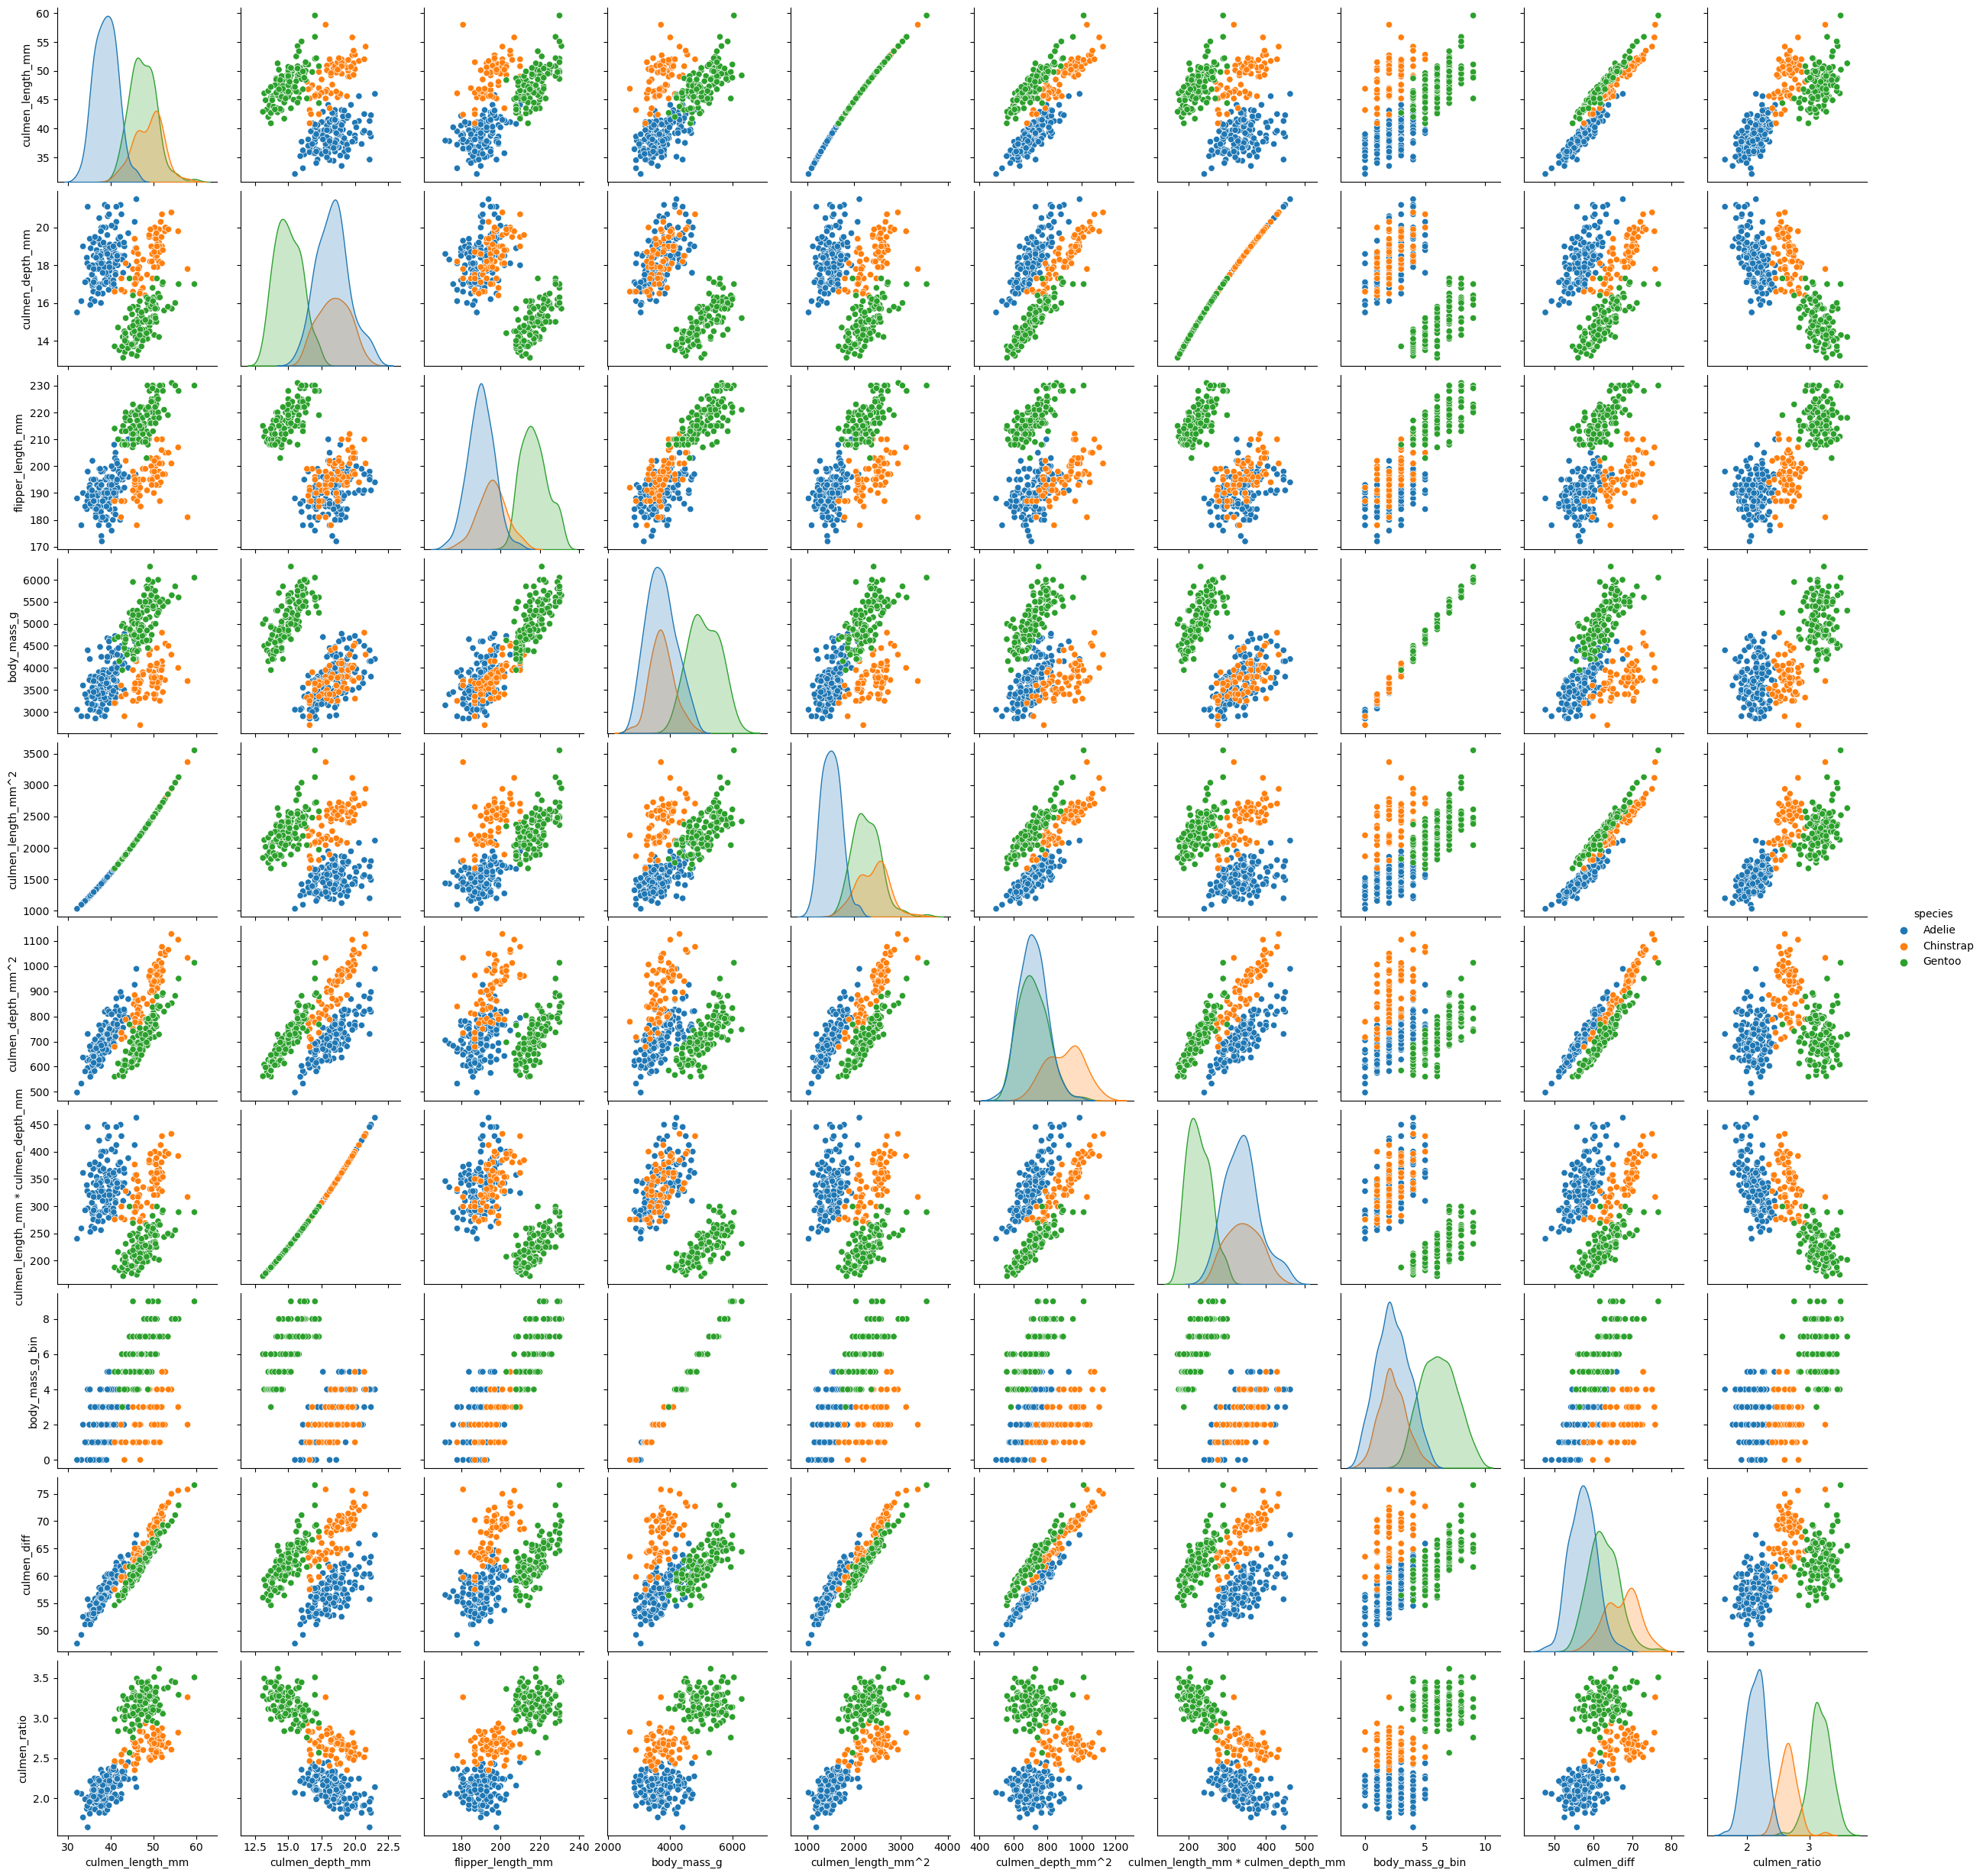

In [34]:
%matplotlib inline
sns.pairplot(df, hue="species")

`culmen_ration`はかなりいい感じに`epecies`を分割できている、いい特徴量になりそう。

## 集約値

In [39]:
df_app = pd.read_csv("data/homecredit_application.csv")
df_prev_app = pd.read_csv("data/homecredit_previous_application.csv")
pd.read_csv("data/homecredit_columns_description.csv")

,Table,Row,Description,Special
0,homecredit_application.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,homecredit_application.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,homecredit_application.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,homecredit_application.csv,CODE_GENDER,Gender of the client,NaN
4,homecredit_application.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
155,homecredit_previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,homecredit_previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,homecredit_previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,homecredit_previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


credit(信用貸付)のデータで、銀行が顧客にローンを融資する際に、その顧客がデフォルトするかどうかのリスクを予測するデータセット。  
`homecredit_application.csv`に今回のローン申請についてのデータ  
`homecredit_previous_application.csv`には顧客の今までのローンの履歴に関するデータが格納されている

In [40]:
df_app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_prev_app.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1891648,100373,Consumer loans,10872.990,115695.0,115119.0,11569.5,115695.0,SATURDAY,22,...,Industry,12.0,low_normal,POS household with interest,365243.0,-1013.0,-683.0,-713.0,-709.0,0.0
1,2670402,100077,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,14,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
2,1514511,101011,Consumer loans,6856.065,65866.5,66735.0,6588.0,65866.5,FRIDAY,21,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-596.0,-266.0,-296.0,-289.0,0.0


#### SK_ID_CURR をキーに過去の累計借用額(credit)の合計を特徴量にする

In [44]:
df_prev_app.sort_values("SK_ID_CURR").head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
2547,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
3507,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1654,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0


In [48]:
credit_prev_sum = df_prev_app.groupby("SK_ID_CURR").sum()[["AMT_CREDIT"]]
df_app.join(credit_prev_sum, on="SK_ID_CURR", rsuffix="_PREV_SUM")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_PREV_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1452573.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,20106.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2625259.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,999832.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101152,0,Cash loans,F,N,N,0,112500.0,495985.5,17946.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,2476305.0
996,101153,0,Cash loans,F,N,Y,0,225000.0,1113840.0,57001.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,41850.0
997,101154,0,Cash loans,F,Y,Y,0,144000.0,517536.0,28206.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,478867.5
998,101155,0,Cash loans,M,N,Y,0,315000.0,1288350.0,37800.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,269901.0
